## Data Cleaning - Scaling and Normalization

In this lesson, scaling and normalization data cleaning operation. In a dataset, some feature values are greater than others multiple times and will affect the result of your data modelling. 

Accordingly, scalling and normalization is applied. Scaling changes the range of your data while normalization is a general term for scaling functions that transforms features into a similar or standard scale.

Some normalization functions are:
- min_max normalization
- z-score normalization or standardization
- Clipping
- Log scaling (eg box_cox transformation)

Usually, normalization methods changes the distribution of your datasets.In general, You should perform scaling when you are using statistical methods that are based on distance metrics between features.

In [47]:
import pandas as pd
import numpy as np

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#seed for reproducibility
np.random.seed(0)

In [34]:
df = pd.read_csv('new-york-history.csv')
df.head()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-01,NY,38577.0,NaN,80,NaN,89995.0,89995.0,5307.0,0,...,38281073,174158,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,2021-02-28,NY,38497.0,NaN,90,NaN,89995.0,89995.0,5259.0,0,...,38106915,273720,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,2021-02-27,NY,38407.0,NaN,86,NaN,89995.0,89995.0,5445.0,0,...,37833195,285307,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,2021-02-26,NY,38321.0,NaN,94,NaN,89995.0,89995.0,5626.0,0,...,37547888,291189,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,2021-02-25,NY,38227.0,NaN,92,NaN,89995.0,89995.0,5703.0,0,...,37256699,278942,NaN,NaN,NaN,NaN,NaN,0,NaN,0


### Drop Missing values

In [37]:
df = df[[column for column in df.columns if df[column].count()>1]]
# df.drop(columns='deathConfirmed', inplace=True) #Drop death confirmed with just 1 value
df.dropna(inplace=True)
df.shape

(299, 20)

In [75]:
df.isnull().sum()

date                                0
state                               0
death                               0
deathIncrease                       0
hospitalized                        0
hospitalizedCumulative              0
hospitalizedCurrently               0
hospitalizedIncrease                0
inIcuCurrently                      0
negativeIncrease                    0
onVentilatorCurrently               0
positive                            0
positiveIncrease                    0
positiveScore                       0
totalTestEncountersViral            0
totalTestEncountersViralIncrease    0
totalTestResults                    0
totalTestResultsIncrease            0
totalTestsPeopleViralIncrease       0
totalTestsViralIncrease             0
dtype: int64

### Get only numerical columns

In [38]:
set(df.dtypes.tolist()) #examine the datatypes of features in the data frame

{dtype('int64'), dtype('float64'), dtype('O')}

In [42]:
df_numeric_features = df.select_dtypes(include = ['float64', 'int64'])
df_numeric_features.head()
df_size = df_numeric_features.shape
print("The data now has {} rows and {} columns".format(df_size[0],df_size[1]))

The data now has 299 rows and 18 columns


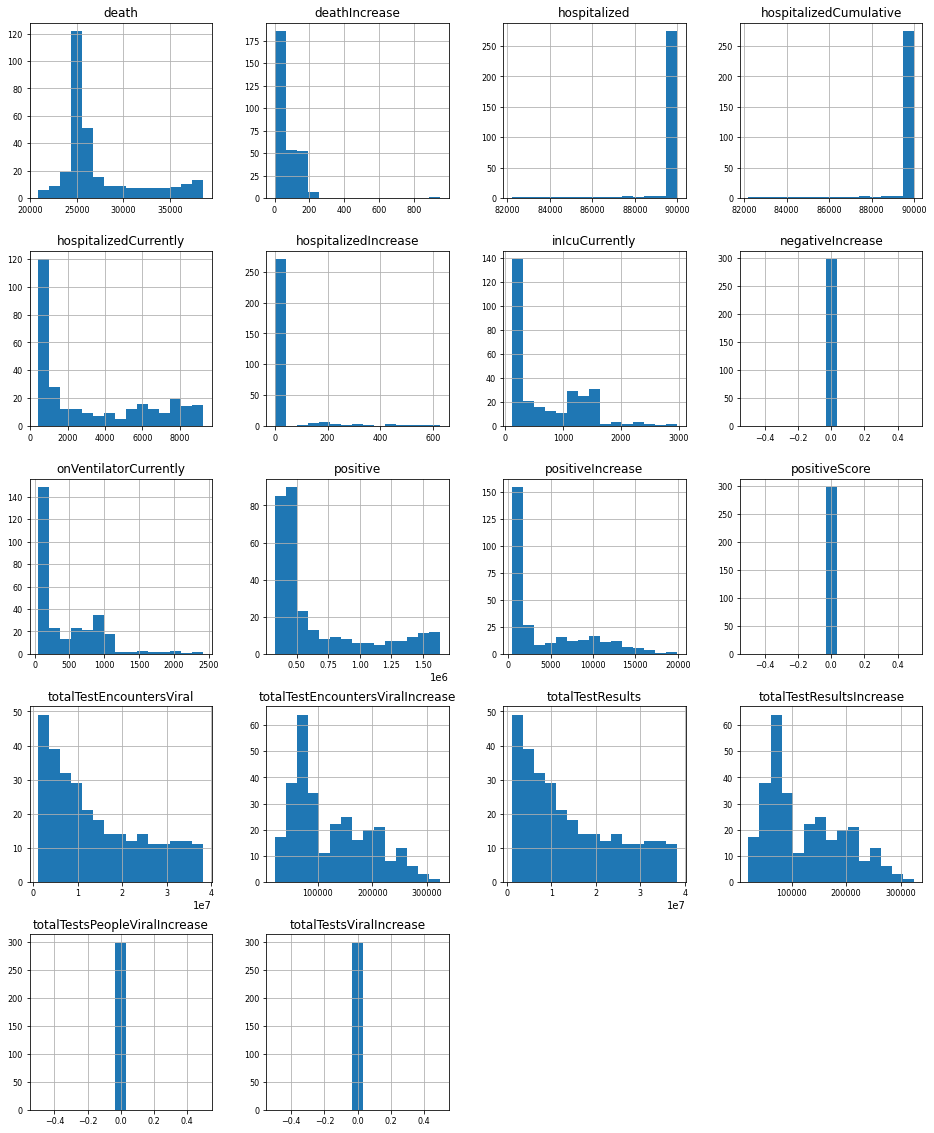

In [101]:
df_numeric_features.hist(figsize=(16, 20), bins=15, xlabelsize=8, ylabelsize=8);

In [62]:
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from sklearn.preprocessing import MinMaxScaler

### Using absolute Max Scaling

Here each feature is rescaled to a value between -1 and 1 by dividing with the absolute maximum value in each column.

In [44]:
df_max_scaled = df_numeric_features.copy()

#perform scalling
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column] / abs(df_max_scaled[column].max())
    
display(df_max_scaled)    

,death,deathIncrease,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCurrently,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,positiveScore,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsPeopleViralIncrease,totalTestsViralIncrease
0,1.000000,0.084122,1.000000,1.000000,0.572307,0.000000,0.357863,NaN,0.305567,1.000000,0.312657,NaN,1.000000,0.536414,1.000000,0.536414,NaN,NaN
1,0.997926,0.094637,1.000000,1.000000,0.567130,0.000000,0.363911,NaN,0.300206,0.996190,0.380102,NaN,0.995451,0.843069,0.995451,0.843069,NaN,NaN
2,0.995593,0.090431,1.000000,1.000000,0.587189,0.000000,0.376680,NaN,0.310515,0.991559,0.408234,NaN,0.988300,0.878757,0.988300,0.878757,NaN,NaN
3,0.993364,0.098843,1.000000,1.000000,0.606708,0.000000,0.380376,NaN,0.317938,0.986585,0.411393,NaN,0.980847,0.896874,0.980847,0.896874,NaN,NaN
4,0.990927,0.096740,1.000000,1.000000,0.615011,0.000000,0.377688,NaN,0.319175,0.981572,0.438572,NaN,0.973241,0.859153,0.973241,0.859153,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.560956,0.170347,0.935541,0.935541,0.779252,0.690590,0.823253,NaN,0.832990,0.205938,0.083241,NaN,0.031469,0.066689,0.031469,0.066689,NaN,NaN
295,0.556757,0.217666,0.930729,0.930729,0.783134,0.759171,0.836022,NaN,0.854845,0.204924,0.113981,NaN,0.030903,0.090030,0.030903,0.090030,NaN,NaN
296,0.551391,0.237645,0.925440,0.925440,0.838564,0.885167,0.895161,NaN,0.908454,0.203535,0.136145,NaN,0.030139,0.099254,0.030139,0.099254,NaN,NaN
297,0.545532,0.228181,0.919273,0.919273,0.883856,0.850080,0.944556,NaN,0.946392,0.201876,0.147327,NaN,0.029298,0.097412,0.029298,0.097412,NaN,NaN


### Min-Max Scaling

Min Max scaling is a popular normalization method based on the formular `(X - X.min()) / (X.max() - X.min())`. This normalization method is useful when there are no outliers as it cannot cope with them (**The same applies to max scaling**). Geometrically speaking, min_max scaling squeashes an n-dimentional data into an n-dimensional unit hypercube. For instance, it is not good proctice to scale income using min-max because only a few people have high income.

**Scikit learn** provide MinMaxScaler method for performing Min Max scaling whose general definition is `class sklearn.preprocessing.MinMaxScaler(feature_range=0, 1, *, copy=True, clip=False)`. Let scale our numerical dataset to values  between 0,1 and 1,-1.

In [70]:
df_min_max_scaled = df_numeric_features.copy()

#perform min max scalling using the formular
for column in df_min_max_scaled.columns:
    col_min = df_min_max_scaled[column].min()
    col_max = df_min_max_scaled[column].max()
    if((col_max -col_min) != 0):
        df_min_max_scaled[column] = (df_min_max_scaled[column] - col_min) /(col_max -col_min)
    
display(df_min_max_scaled)  

,death,deathIncrease,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCurrently,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,positiveScore,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsPeopleViralIncrease,totalTestsViralIncrease
0,1.000000,0.083158,1.000000,1.000000,0.552522,0.000000,0.333450,0,0.291842,1.000000,0.298911,0,1.000000,0.505230,1.000000,0.505230,0,0
1,0.995493,0.093684,1.000000,1.000000,0.547106,0.000000,0.339728,0,0.286375,0.995238,0.367705,0,0.995317,0.832513,0.995317,0.832513,0,0
2,0.990422,0.089474,1.000000,1.000000,0.568092,0.000000,0.352982,0,0.296888,0.989448,0.396399,0,0.987957,0.870602,0.987957,0.870602,0,0
3,0.985577,0.097895,1.000000,1.000000,0.588514,0.000000,0.356819,0,0.304458,0.983230,0.399622,0,0.980286,0.889937,0.980286,0.889937,0,0
4,0.980281,0.095789,1.000000,1.000000,0.597202,0.000000,0.354029,0,0.305719,0.976963,0.427344,0,0.972457,0.849679,0.972457,0.849679,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.045749,0.169474,0.256091,0.256091,0.769040,0.690590,0.816533,0,0.829689,0.007322,0.064907,0,0.003085,0.003909,0.003085,0.003909,0,0
295,0.036622,0.216842,0.200564,0.200564,0.773102,0.759171,0.829787,0,0.851976,0.006054,0.096261,0,0.002503,0.028819,0.002503,0.028819,0,0
296,0.024959,0.236842,0.139523,0.139523,0.831096,0.885167,0.891175,0,0.906644,0.004318,0.118869,0,0.001717,0.038664,0.001717,0.038664,0,0
297,0.012226,0.227368,0.068351,0.068351,0.878484,0.850080,0.942449,0,0.945332,0.002244,0.130275,0,0.000850,0.036699,0.000850,0.036699,0,0


In [67]:
scale=MinMaxScaler(feature_range=(-1,1))
scale.fit(df_min_max_scaled)
df_MinMaxScaler = scale.transform(df_min_max_scaled)

In [68]:
display(df_MinMaxScaler)

array([[ 1.        , -0.83368421,  1.        , ...,  0.01045995,
        -1.        , -1.        ],
       [ 0.99098541, -0.81263158,  1.        , ...,  0.66502525,
        -1.        , -1.        ],
       [ 0.98084399, -0.82105263,  1.        , ...,  0.74120339,
        -1.        , -1.        ],
       ...,
       [-0.95008169, -0.52631579, -0.72095409, ..., -0.92267133,
        -1.        , -1.        ],
       [-0.97554792, -0.54526316, -0.86329828, ..., -0.92660285,
        -1.        , -1.        ],
       [-1.        ,  1.        , -1.        , ..., -0.91103456,
        -1.        , -1.        ]])

In [69]:
scale_01=MinMaxScaler()
scale_01.fit(df_min_max_scaled)
df_MinMaxScaler_01 = scale_01.transform(df_min_max_scaled)
display(df_MinMaxScaler_01)

array([[1.        , 0.08315789, 1.        , ..., 0.50522997, 0.        ,
        0.        ],
       [0.9954927 , 0.09368421, 1.        , ..., 0.83251262, 0.        ,
        0.        ],
       [0.990422  , 0.08947368, 1.        , ..., 0.87060169, 0.        ,
        0.        ],
       ...,
       [0.02495915, 0.23684211, 0.13952295, ..., 0.03866433, 0.        ,
        0.        ],
       [0.01222604, 0.22736842, 0.06835086, ..., 0.03669857, 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.04448272, 0.        ,
        0.        ]])

### Z-score scaling or standardization

This method transform the data into a normal distribution with mean 0 and standard deviation of 1. Each standardized value is calculated by subtracting the mean of its feature and dividing by corresponding standard deviation. In general, you should perform standardization when you are using statistical methods or machine learning algorithms that assumes that the information follows a normal distribution.

We will explore diffrent methods of standardization next.

In [93]:
df_standardized = df_numeric_features.copy()

for column in df_numeric_features.columns:
    col_std = df_numeric_features[column].std()
    if(col_std != 0):
        df_standardized[column] = (df_numeric_features[column] - df_numeric_features[column].mean()) / col_std
    
display(df_standardized)    

,death,deathIncrease,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCurrently,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,positiveScore,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsPeopleViralIncrease,totalTestsViralIncrease
0,2.701587,0.217334,0.250029,0.250029,0.668906,-0.286433,0.576854,0,0.596157,2.532641,0.384067,0,2.213532,0.713488,2.213532,0.713488,0,0
1,2.682384,0.341822,0.250029,0.250029,0.652985,-0.286433,0.605328,0,0.569004,2.516418,0.664097,0,2.197420,2.143966,2.197420,2.143966,0,0
2,2.660782,0.292027,0.250029,0.250029,0.714680,-0.286433,0.665440,0,0.621222,2.496696,0.780898,0,2.172097,2.310444,2.172097,2.310444,0,0
3,2.640140,0.391618,0.250029,0.250029,0.774716,-0.286433,0.682841,0,0.658819,2.475514,0.794014,0,2.145703,2.394955,2.145703,2.394955,0,0
4,2.617577,0.366720,0.250029,0.250029,0.800256,-0.286433,0.670186,0,0.665085,2.454168,0.906859,0,2.118764,2.218994,2.118764,2.218994,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,-1.363757,1.238138,-4.920777,-4.920777,1.305419,4.115177,2.767768,0,3.267624,-0.848820,-0.568453,0,-1.216531,-1.477673,-1.216531,-1.477673,0,0
295,-1.402641,1.798335,-5.306738,-5.306738,1.317360,4.552289,2.827879,0,3.378326,-0.853140,-0.440826,0,-1.218534,-1.368795,-1.218534,-1.368795,0,0
296,-1.452327,2.034863,-5.731028,-5.731028,1.487849,5.355354,3.106291,0,3.649859,-0.859054,-0.348801,0,-1.221238,-1.325763,-1.221238,-1.325763,0,0
297,-1.506573,1.922823,-6.225735,-6.225735,1.627159,5.131715,3.338829,0,3.842021,-0.866118,-0.302372,0,-1.224219,-1.334355,-1.224219,-1.334355,0,0


### Using Scikit Learn - Standard Scaler

In [78]:
from sklearn.preprocessing import StandardScaler

In [96]:
std_scale = StandardScaler().fit(df_numeric_features)
df_standardized = std_scale.transform(df_numeric_features)
display(df_standardized)

array([[ 2.70611566,  0.21769837,  0.25044844, ...,  0.71468434,
         0.        ,  0.        ],
       [ 2.68688128,  0.34239533,  0.25044844, ...,  2.14755991,
         0.        ,  0.        ],
       [ 2.6652426 ,  0.29251655,  0.25044844, ...,  2.3143176 ,
         0.        ,  0.        ],
       ...,
       [-1.45476163,  2.03827398, -5.74063545, ..., -1.32798583,
         0.        ,  0.        ],
       [-1.50909875,  1.92604671, -6.2361722 , ..., -1.33659212,
         0.        ,  0.        ],
       [-1.56127201, 11.07880353, -6.71206605, ..., -1.30251236,
         0.        ,  0.        ]])

In [100]:
print('Mean after standardization:\n{} ={:.2f}, {} ={:.2f}'
      .format(df_numeric_features.columns[0], df_standardized[:,0].mean(), df_numeric_features.columns[1], df_standardized[:,1].mean()))

Mean after standardization:
death =-0.00, deathIncrease =0.00


### Box-cox transformation

Box-cox transformation handles data with heteroscedasticity or inconsistent variance. Imagine you are in a class, there are fast readers and slow readers. So, logically speaking, the fast readers will have the same variance in their reading time for a passage, whereas the slowest ones will have a larger difference in their reading time. This is an example of inconsistent variance between fast readers and slow readers. Data that have heteroscedasticity follow a a power law distribution where the relative change in one quantity varies as the power of another.

Box-cox transformation transforms this non-normal distributions into a normal shape using a logarithmic transformation function. [Read more on box-cox transformation here](https://www.geeksforgeeks.org/box-cox-transformation-using-python/)

Let apply box-cox transformation from scipy stats module

In [120]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(df_numeric_features['onVentilatorCurrently'])

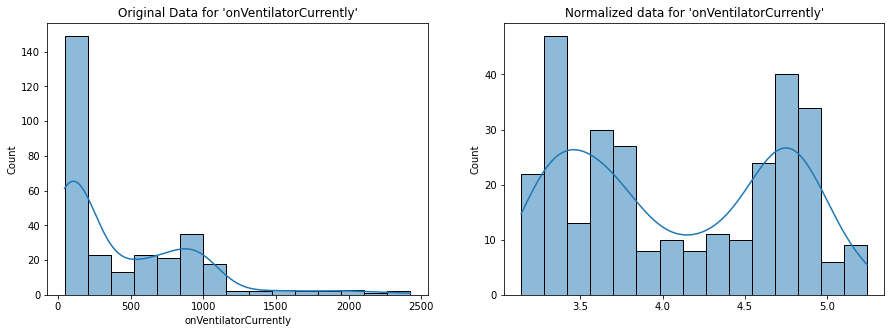

In [124]:
# plot both together to compare
fig, ax=plt.subplots(1,2, figsize=(15,5))
sns.histplot(df_numeric_features['onVentilatorCurrently'], bins=15, ax=ax[0],kde=True )
ax[0].set_title("Original Data for 'onVentilatorCurrently'")
sns.histplot(normalized_data[0], bins=15, ax=ax[1], kde=True)
ax[1].set_title("Normalized data for 'onVentilatorCurrently'")
plt.show()

It seems the `onVentilatorCurrently` feature is better handled with a different normalization technique. In practice, ths disribution of each feature should be viewed before deciding which scaling of normalization method to use.

### When to use a method

- min-max : Use this when the feature is more or less uniformly distributed accross a fixed range.
- standardization : when the distribution does not contain extreme outliers
- log scaling : when the feature conforms to power rule
- clipping : use this when the feature contains extreme outliers

A combination of more than method may be used for a set of values